<a href="https://colab.research.google.com/github/paarthbamb/dataScience/blob/main/Unit2/PaarBambU2Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Are the Dallas Cowboys Covering the Spread?**

# **Part I: Context**

In the world of sports betting, one of the most common metrics used to evaluate performance against expectations is the point spread. If a team “covers the spread”, it means they either won by more points than expected (if favored) or lost by fewer points than expected (if underdogs). I wanted to analyze whether the Dallas Cowboys are performing above or below expectations by looking at whether they cover the spread.

I collected a dataset of Cowboys games with their final scores and the betting spread and calculated whether they covered (1 = cover, 0 = no cover).

In [ ]:
!pip install preliz --quiet

import preliz as pz
import numpy as np
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 5.6 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/paarthbamb/nflData/refs/heads/main/nfl_cover_dataset.csv')
df


,date,opponent,cowboys_score,opponent_score,spread,cover
0,2016-09-11,Giants,27,26,-3.5,1
1,2016-09-18,Browns,20,10,-7.0,1
2,2016-09-25,Packers,16,35,+2.5,0
3,2016-10-02,Eagles,10,28,-4.5,0
4,2016-10-09,Steelers,24,26,+1.0,0
...,...,...,...,...,...,...
153,2024-12-08,49ers,17,35,+6.5,0
154,2024-12-15,Lions,33,27,-3.5,1
155,2024-12-22,Bears,21,10,-7.0,1
156,2024-12-29,Panthers,20,17,-3.0,1


**Calculation of Cover Days**

Let's count how many games the Cowboys covered vs. did not cover:



In [ ]:
cover_count = (df['cover'] == 1).sum()
no_cover_count = (df['cover'] == 0).sum()

print("Covered:", cover_count)
print("Did not cover:", no_cover_count)


Covered: 96
Did not cover: 62


# **Part II: Prior**

My prior belief is that, since oddsmakers are usually pretty accurate, the Cowboys should cover about 50% of the time. But since I have no strong bias about whether they are over- or under-performing, my prior will be weakly informative and centered at 50%, using a Beta distribution with parameters α = 10 and β = 10.

<Axes: >

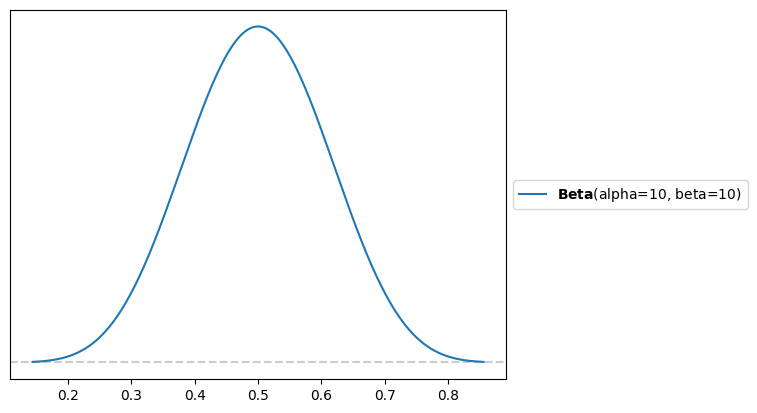

In [ ]:
pz.Beta(10,10).plot_pdf()


# **Part III: Likelihood**

The likelihood represents the probability of seeing the number of covers we observed given a true probability of covering the spread.

<Axes: >

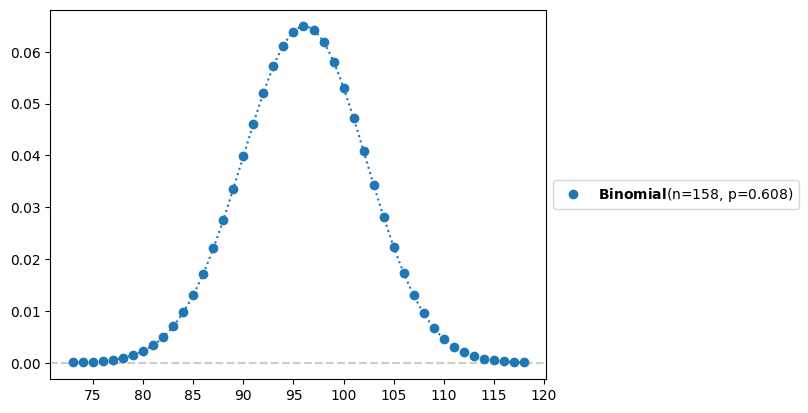

In [ ]:
n = len(df)
k = cover_count

pz.Binomial(n=n, p=k/n).plot_pdf()


# **Part IV: Posterior**

Now, I combine my prior and likelihood to form the posterior using PyMC:

In [ ]:
data = df['cover'].values

with pm.Model() as cowboys_model:
    θ = pm.Beta('θ', alpha=10, beta=10)
    y = pm.Bernoulli('y', p=θ, observed=data)
    idata_cowboys = pm.sample()


Output()

# **Part V: Conclusion**

The posterior below shows the estimated probability that the Cowboys cover the spread on a given game. The shaded region is the 94% HDI, meaning there’s a 94% chance that the true coverage rate lies in this range.

<Axes: title={'center': 'θ'}>

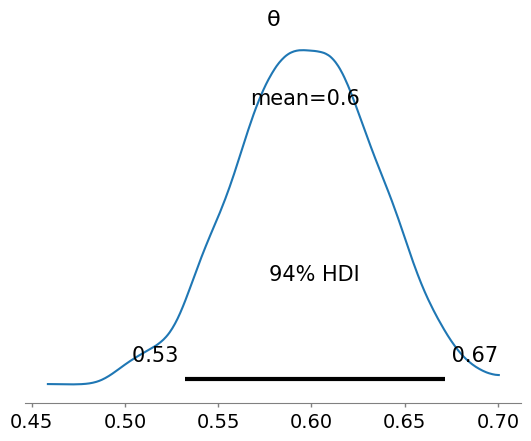

In [ ]:
az.plot_posterior(idata_cowboys)

The distribution shows the estimated probability that the Dallas Cowboys cover the spread, with a 94% chance that the true coverage rate falls between roughly 0.53 and 0.67. While my prior assumed they would cover about half the time based on the typical accuracy of oddsmakers, the posterior suggests otherwise. The mean of around 0.60 indicates the Cowboys have been covering more frequently than expected, hinting that they may be slightly outperforming betting market expectations.